# Hyperbolic Geometry Utility Functions

## Imports

In [1]:
from typing import List

import numpy as np
import matplotlib.pyplot as plt

from pyzeta.geometry.sl2r import SL2R
from pyzeta.geometry.visuals import plotFundDom, hypPlaneWave, SLtoSU
from pyzeta.geometry.helpers import HtoD
from pyzeta.core.dynamics.function_systems.implementations import (
    FunnelTorus,
    HyperbolicCylinder,
)
from pyzeta.framework.initialization.initialization_handler import (
    PyZetaInitializationHandler,
)

PyZetaInitializationHandler.initPyZetaServices()

## Define the Examples

In [2]:
def funnelTorusExample(model: str = "H") -> None:
    "Illustrate fundamental domain plotting with funneled torus."
    torus = FunnelTorus(2.0, 2.0, np.pi / 2.0)
    z0 = 1j

    generators = [SL2R(mat) for mat in torus._phi[:2]]
    if model == "D":
        for i, gen in enumerate(generators):
            generators[i] = SLtoSU(gen)  # type: ignore
        z0 = HtoD(z0)
    plotFundDom(*generators, z0=z0)
    plt.show()


def hyperbolicCylinderExample(model: str = "H") -> None:
    "Illustrate fundamental domain plotting with funneled torus."
    torus = HyperbolicCylinder(3.0, rotate=True)
    z0 = 1j

    generators = [SL2R(mat) for mat in torus._phi[:1]]
    if model == "D":
        for i, gen in enumerate(generators):
            generators[i] = SLtoSU(gen)  # type: ignore
        z0 = HtoD(z0)
    plotFundDom(*generators, z0=z0)
    plt.show()

In [3]:
def planeWavesExample1(model: str = "H") -> None:
    "Simple example of hyperbolic plane waves on the upper halfplane."
    # hyperbolic plane waves example1
    realArr = np.linspace(-2.0, 2.0, 1000)
    imagArr = np.linspace(0.0, 4.0, 1000)
    xi: List[complex] = [
        0.0 + 0.0j,
    ]
    k = [
        5.0,
    ]

    wave = hypPlaneWave(realArr, imagArr, xi, k, model="H")
    wave[wave == np.infty] = -1.0
    plt.imshow(
        np.abs(wave),
        cmap="Reds",
        interpolation="nearest",
        origin="lower",
        extent=[-2, 2, 0, 4.0],
    )
    plt.show()


In [4]:
def planeWavesExample2(model: str = "H") -> None:
    "More complex example of hyperbolic plane waves on the Poincare disc."
    realArr = np.linspace(-1.0, 1.0, 8000)
    imagArr = np.linspace(-1.0, 1.0, 8000)
    xi = [1.0, -1.0]
    k = [2.0, 3.0]

    wave = hypPlaneWave(realArr, imagArr, xi, k, model="D")
    wave[wave == np.nan] = 0.0
    plt.imshow(
        np.abs(wave),
        cmap="Reds",
        interpolation="nearest",
        origin="lower",
        extent=[-1, 1, -1, 1],
    )
    plt.show()


## Run the Examples

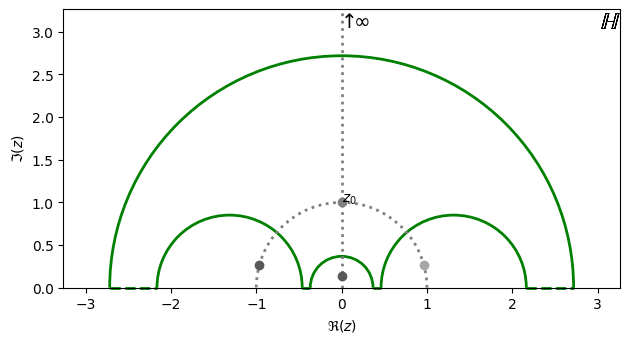

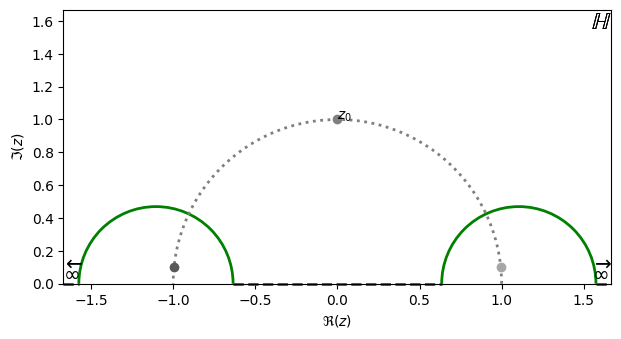

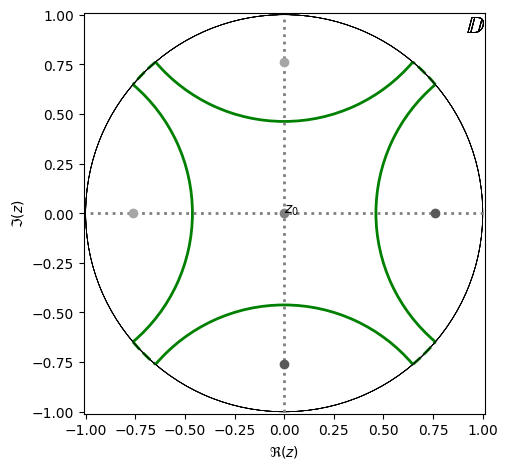

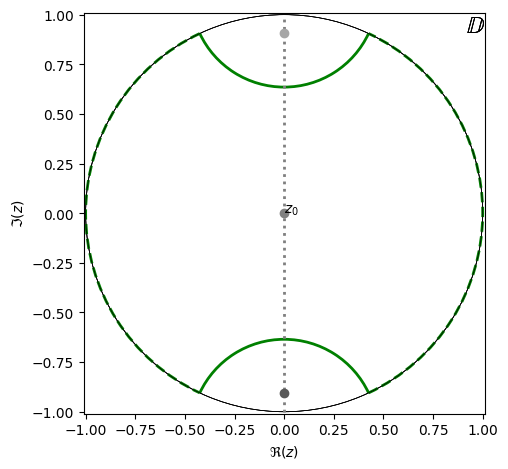

In [5]:
funnelTorusExample(model="H")
hyperbolicCylinderExample(model="H")
funnelTorusExample(model="D")
hyperbolicCylinderExample(model="D")


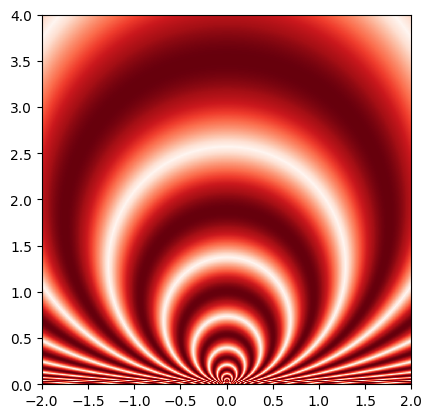

In [6]:
planeWavesExample1()


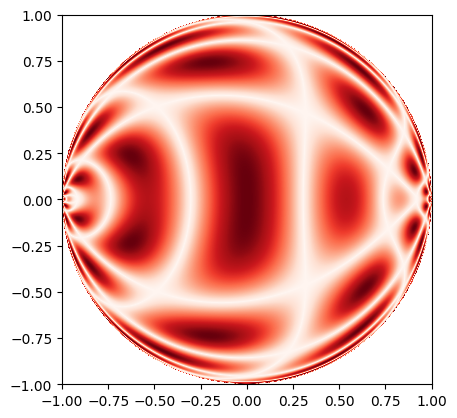

In [7]:
planeWavesExample2()
